Reading the Dataset

In [32]:
import pandas as pd

In [33]:
listings = pd.read_csv("/content/AB_NYC_2019.csv")
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Data Preperation and Cleaning

In [34]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [35]:
#Converting Dated Column Data type to datetime
listings["last_review"]= pd.to_datetime(listings["last_review"])
listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [36]:
brooklyn_listings = (
        listings
        .query("neighbourhood_group=='Brooklyn'") #filtering rows based on necessary values
        .loc[:,["neighbourhood_group", "neighbourhood", "room_type", "last_review", "price"]] #filtering necessary columns
    )
brooklyn_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20104 entries, 0 to 48891
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   neighbourhood_group  20104 non-null  object        
 1   neighbourhood        20104 non-null  object        
 2   room_type            20104 non-null  object        
 3   last_review          16447 non-null  datetime64[ns]
 4   price                20104 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 942.4+ KB


In [37]:
brooklyn_listings.describe()

,last_review,price
count,16447,20104.000000
mean,2018-09-25 17:30:17.839119616,124.383207
min,2011-03-28 00:00:00,0.000000
25%,2018-06-20 00:00:00,60.000000
50%,2019-05-13 00:00:00,90.000000
75%,2019-06-23 00:00:00,150.000000
max,2019-07-08 00:00:00,10000.000000
std,NaN,186.873538


Preparing Data for Vizualisation

In [38]:
#mean of price by neighbourhood
brooklyn_listings_neighbourhood = (
    brooklyn_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values("price")
    )
brooklyn_listings_neighbourhood.head()

,price
neighbourhood,
Borough Park,63.066176
Bensonhurst,75.786667
Brownsville,76.459016
Gravesend,79.014706
Midwood,80.339450


In [39]:
#average price range depending on the room type
brooklyn_listings_roomtype = (
    brooklyn_listings
    .groupby("room_type")
    .agg({"price":"mean"})
    .sort_values("price")
    )
brooklyn_listings_roomtype .head()

,price
room_type,
Shared room,50.527845
Private room,76.500099
Entire home/apt,178.327545


In [40]:
brooklyn_listings_over_time = (
    brooklyn_listings
    .groupby("last_review")
    .agg({"price": "mean"})
    .reset_index()  # Reset index to make "last_review" a column again
    .sort_values("last_review") # Sort the DataFrame by "last_review" if needed
)

print(brooklyn_listings_over_time)

     last_review       price
0     2011-03-28   55.000000
1     2011-04-25  250.000000
2     2011-05-12  249.000000
3     2011-09-18   90.000000
4     2011-12-28  299.000000
...          ...         ...
1539  2019-07-04  113.007299
1540  2019-07-05  130.884774
1541  2019-07-06  124.063927
1542  2019-07-07  151.020408
1543  2019-07-08  103.173913

[1544 rows x 2 columns]


 Data Vizualisation

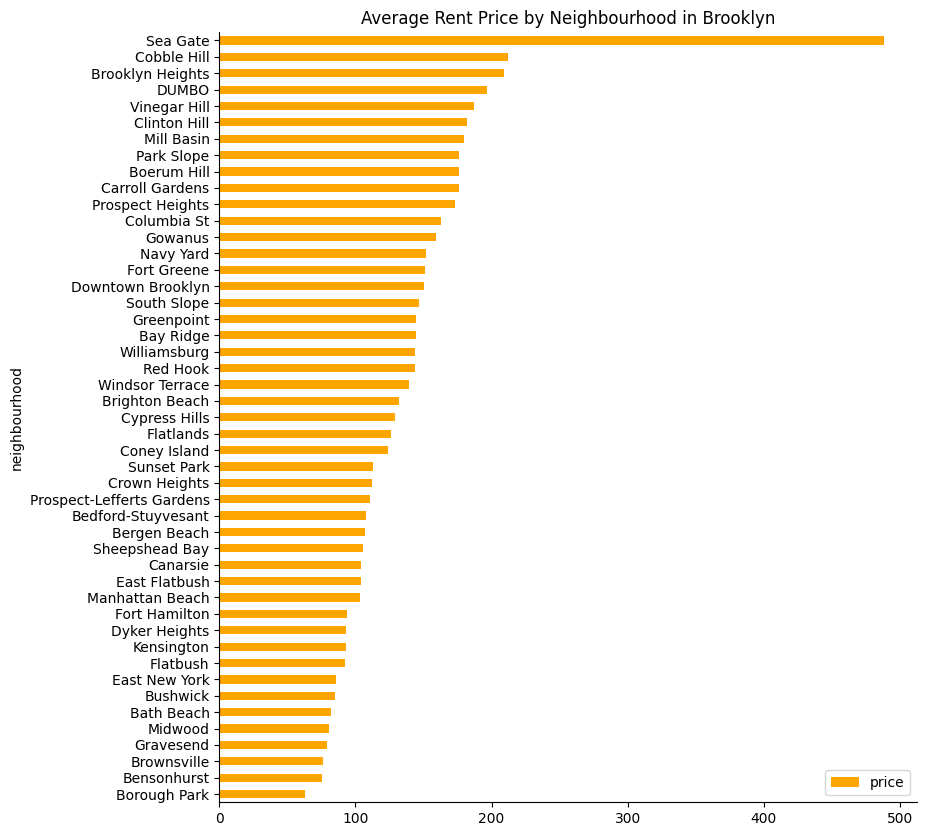

In [43]:
(brooklyn_listings_neighbourhood.plot.barh(figsize=(9, 10), color='orange'))
plt.title('Average Rent Price by Neighbourhood in Brooklyn')

import seaborn as sns
sns.despine() #to remove border

Seagate has higher rent prices compared to other neighborhoods in Brooklyn, it "stands out" as a relatively expensive neighborhood. On the other hand,Borough Park has lower rent prices compared to other neighborhoods, it "stands out" as a relatively cheaper neighborhood.

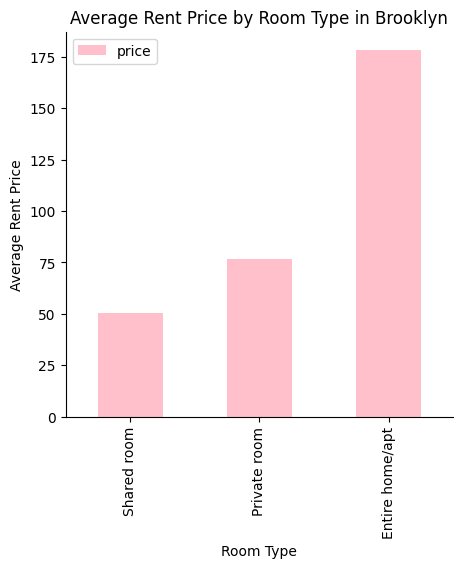

In [63]:
(brooklyn_listings_roomtype.plot.bar(figsize=(5,5), color='pink'))
plt.title('Average Rent Price by Room type in Brooklyn')

plt.xlabel('Room Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Room Type in Brooklyn')

sns.despine() #to remove border

 Average prices: Shared room ($50.5), Private room ($76.5), Entire apartment ($178.3).

Text(0.5, 1.0, 'Average Price Over Time')

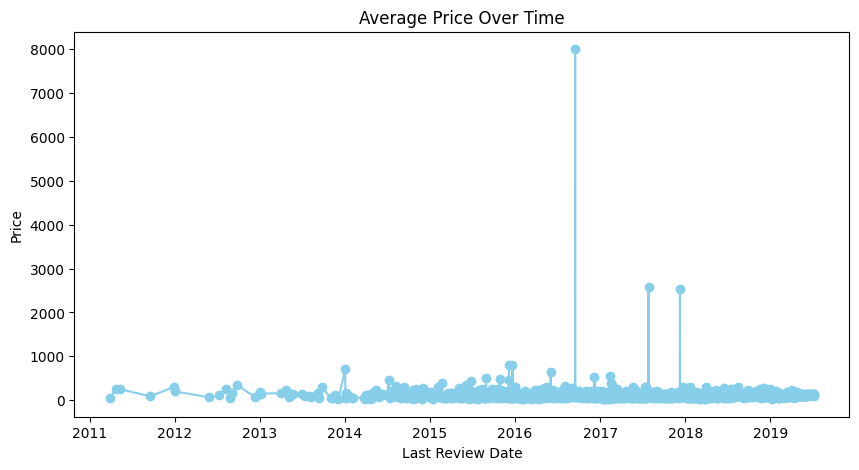

In [62]:
import matplotlib.pyplot as plt

# Assuming brooklyn_listings_over_time is your DataFrame with "last_review" and "price" columns

# Sort the DataFrame by "last_review" date
brooklyn_listings_over_time_sorted = brooklyn_listings_over_time.sort_values("last_review")
plt.figure(figsize=(10, 5))
plt.plot(brooklyn_listings_over_time_sorted["last_review"], brooklyn_listings_over_time_sorted["price"], marker='o', color='skyblue')
plt.xlabel('Last Review Date')
plt.ylabel('Price')
plt.title('Average Price Over Time')